In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# K-Means Clustering with Gnostic Weights

### **Overview**
The **Machine Gnostics KMeansClustering** provides robust unsupervised clustering using the same Riemannian geometric framework as our supervised models. Unlike traditional K-means, it automatically handles outliers and noisy data through **adaptive gnostic weights**.

Key advantages for clustering:
- Automatic robustness to outliers and noise
- Dynamic weighting reduces impact of anomalous points
- Interpretable sample weights for outlier detection
- Comprehensive history tracking for convergence analysis
- Gnostic characteristics for cluster quality assessment

---

### **Theoretical Background**

The KMeansClustering implements **Gnostic Weighted Clustering** with these key features:

*   **Thermodynamic Clustering:**
    Rather than minimizing only inertia, the model optimizes through the **Ideal Gnostic Cycle (IGC)**, balancing information maximization and entropy minimization.

*   **Adaptive Sample Weighting:**
    Each sample receives a **Gnostic Weight** based on how well it fits within its cluster. Outliers and noisy points automatically receive lower weights through the computed gnostic characteristics.

*   **Initialization Methods:**
    Supports both random initialization and K-means++ for better initial centroid placement, reducing sensitivity to starting conditions.

*   **Convergence Monitoring:**
    Tracks loss, rentropy, and gnostic characteristics across iterations, providing detailed insights into the clustering process.

***

## Example 1: Basic K-Means Clustering

A simple example showing how to use KMeans clustering on a synthetic dataset with clear cluster structure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import KMeansClustering

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with 3 clusters
def generate_clustered_data(n_samples=100, n_clusters=3, cluster_std=0.8):
    """
    Generate synthetic clustered data.
    
    Parameters
    ----------
    n_samples : int
        Total number of samples
    n_clusters : int
        Number of clusters
    cluster_std : float
        Standard deviation of clusters
    """
    samples_per_cluster = n_samples // n_clusters
    X_list = []
    
    # Dynamically generate cluster centers based on n_clusters
    # Arrange centers in a grid-like pattern
    if n_clusters <= 3:
        centers = [np.array([-5, 0]), np.array([3, -1]), np.array([5, -1])][:n_clusters]
    else:
        # For more than 3 clusters, generate centers in a circular pattern
        angles = np.linspace(0, 2 * np.pi, n_clusters, endpoint=False)
        radius = 8
        centers = [np.array([radius * np.cos(angle), radius * np.sin(angle)]) 
                   for angle in angles]
    
    for i in range(n_clusters):
        cluster_data = np.random.randn(samples_per_cluster, 2) * cluster_std + centers[i]
        X_list.append(cluster_data)
    
    X = np.vstack(X_list)
    
    # Shuffle data
    indices = np.random.permutation(len(X))
    X = X[indices]
    
    return X

# Generate data
X = generate_clustered_data(n_samples=100, n_clusters=3, cluster_std=0.6)

print(f"Dataset generated: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

Dataset generated: 99 samples, 2 features
Feature 1 range: [-6.03, 6.12]
Feature 2 range: [-2.19, 1.11]


In [3]:
# Fit the K-Means model with 3 clusters
model = KMeansClustering(
    n_clusters=3,
    max_iter=100,
    tolerance=1e-4,
    init='kmeans++',  # Use k-means++ initialization
    verbose=True,
)

# Fit and predict
model.fit(X)
labels = model.predict(X)

print("\nModel fitted successfully!")
print(f"Number of iterations: {len(model._history) - 1}")
print(f"Final centroids:\n{model.centroids}")
print(f"\nCluster labels (first 10): {labels[:10]}")

2026-01-29 13:35:26,913 | KMeansClustering | INFO | KMeansClustering initialized.
2026-01-29 13:35:26,915 | KMeansClustering | INFO | KMeansClustering initialized:
2026-01-29 13:35:26,915 | KMeansClustering | INFO | KMeansClustering initialized:
2026-01-29 13:35:26,915 | KMeansClustering | INFO | KMeansClustering initialized:
2026-01-29 13:35:26,916 | KMeansClustering | INFO | HistoryClusteringBase initialized.
2026-01-29 13:35:26,916 | KMeansClustering | INFO | KMeansClustering initialized:
2026-01-29 13:35:26,916 | KMeansClustering | INFO | Starting fit process for KMeansClustering.
2026-01-29 13:35:26,917 | KMeansClustering | INFO | Starting fit input/output processing for clustering.
2026-01-29 13:35:26,917 | KMeansClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-29 13:35:26,917 | KMeansClustering | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-29 13:35:26,918 | KMeansClustering | INFO | Starting fit process for History


Model fitted successfully!
Number of iterations: 34
Final centroids:
[[ 3.01982861 -1.06180983]
 [-5.17528304  0.13545556]
 [ 5.01405013 -0.83848074]]

Cluster labels (first 10): [0 0 0 1 2 1 1 1 2 2]


In [4]:
# Calculate cluster statistics
unique_labels, counts = np.unique(labels, return_counts=True)

print("Cluster Statistics:")
print("=" * 50)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples ({count/len(labels)*100:.1f}%)")
print("=" * 50)

# Calculate score (negative inertia)
score = model.score(X)
inertia = -score  # Convert to positive inertia
print(f"\nInertia (sum of squared distances): {inertia:.2f}")

2026-01-29 13:35:27,001 | KMeansClustering | INFO | Calculating inertia score with KMeansClustering.
2026-01-29 13:35:27,002 | KMeansClustering | INFO | Starting score input/output processing for clustering.
2026-01-29 13:35:27,003 | KMeansClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-29 13:35:27,003 | KMeansClustering | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-29 13:35:27,003 | KMeansClustering | INFO | Computing inertia score for ClusteringCalBase.
2026-01-29 13:35:27,003 | KMeansClustering | INFO | Starting prediction for ClusteringCalBase.
2026-01-29 13:35:27,004 | KMeansClustering | INFO | Computing distances between samples and centroids.
2026-01-29 13:35:27,004 | KMeansClustering | INFO | Assigning samples to clusters.


Cluster Statistics:
Cluster 0: 32 samples (32.3%)
Cluster 1: 33 samples (33.3%)
Cluster 2: 34 samples (34.3%)

Inertia (sum of squared distances): 62.40


### Basic Visualization: Clusters and Centroids

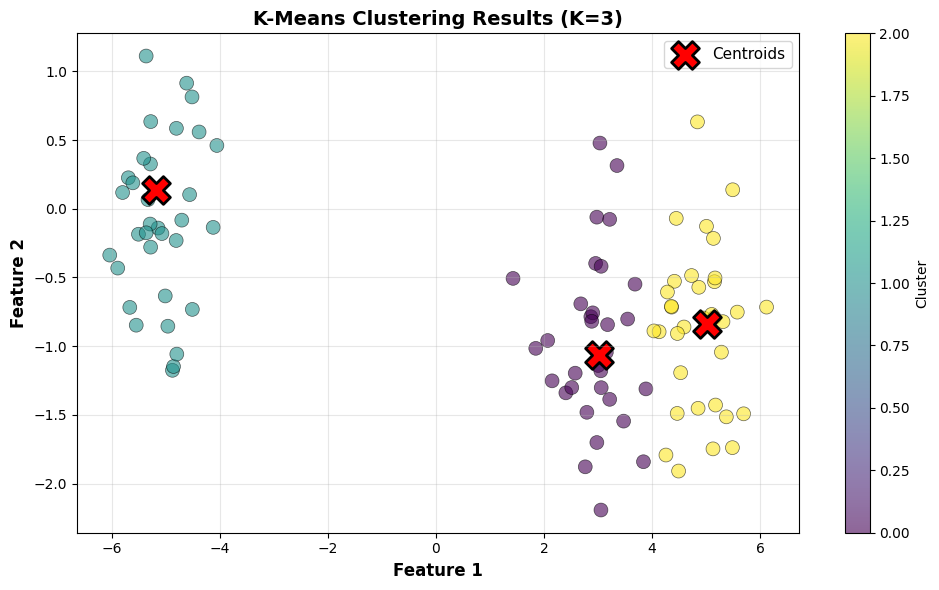

Note: The X markers show the final cluster centroids


In [5]:
# Visualize clustering results
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidths=0.5)

# Plot centroids
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], 
           c='red', marker='X', s=400, edgecolors='black', 
           linewidths=2, label='Centroids')

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Results (K=3)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The X markers show the final cluster centroids")

## Example 2: Understanding Gnostic Weights

This example shows how the model automatically assigns weights to samples, identifying outliers and noisy points.

In [6]:
# Generate data with explicit outliers
np.random.seed(42)
X_with_outliers = generate_clustered_data(n_samples=90, n_clusters=3, cluster_std=0.6)

# Add outliers far from clusters
outliers = np.array([
    [-10, 8], [12, -8], [-8, -10], [10, 10], [0, 15],
    [-15, -5], [15, 3], [-3, -12], [8, 12], [-12, 10]
])
X_with_outliers = np.vstack([X_with_outliers, outliers])

print(f"Dataset: {len(X_with_outliers)} samples (90 regular + 10 outliers)")
print(f"Outlier indices: {list(range(90, 100))}")

Dataset: 100 samples (90 regular + 10 outliers)
Outlier indices: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [7]:
# Fit model with gnostic characteristics enabled
model_gnostic = KMeansClustering(
    n_clusters=3,
    max_iter=100,
    tolerance=1e-4,
    init='kmeans++',
    verbose=False,
    gnostic_characteristics=True,  # Enable detailed tracking
    history=True,
)

model_gnostic.fit(X_with_outliers)
labels_gnostic = model_gnostic.predict(X_with_outliers)
weights = model_gnostic.weights

print("Gnostic Weights Summary:")
print("-" * 60)
print(f"Total samples: {len(weights)}")
print(f"Mean weight:   {np.mean(weights):.6f}")
print(f"Min weight:    {np.min(weights):.6f}")
print(f"Max weight:    {np.max(weights):.6f}")
print(f"Std weight:    {np.std(weights):.6f}")

# Identify samples with low weights (potential outliers)
low_weight_threshold = np.percentile(weights, 10)
low_weight_indices = np.where(weights < low_weight_threshold)[0]

print(f"\nSamples with weights below 10th percentile ({len(low_weight_indices)} total):")
print(f"Threshold: {low_weight_threshold:.6f}")
print(f"Detected low-weight samples: {sorted(low_weight_indices.tolist())}")
print(f"True outlier indices: {list(range(90, 100))}")

# Calculate detection accuracy
true_outliers_detected = len([idx for idx in low_weight_indices if idx >= 90])
print(f"\nOutlier detection accuracy: {true_outliers_detected}/10 = {true_outliers_detected*10}%")
print("\nNote: Low-weight samples are automatically identified by gnostic weights!")

Gnostic Weights Summary:
------------------------------------------------------------
Total samples: 100
Mean weight:   0.010000
Min weight:    0.000000
Max weight:    0.027457
Std weight:    0.009465

Samples with weights below 10th percentile (10 total):
Threshold: 0.000000
Detected low-weight samples: [9, 90, 91, 92, 94, 95, 96, 97, 98, 99]
True outlier indices: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Outlier detection accuracy: 9/10 = 90%

Note: Low-weight samples are automatically identified by gnostic weights!


### Visualization: Gnostic Weights

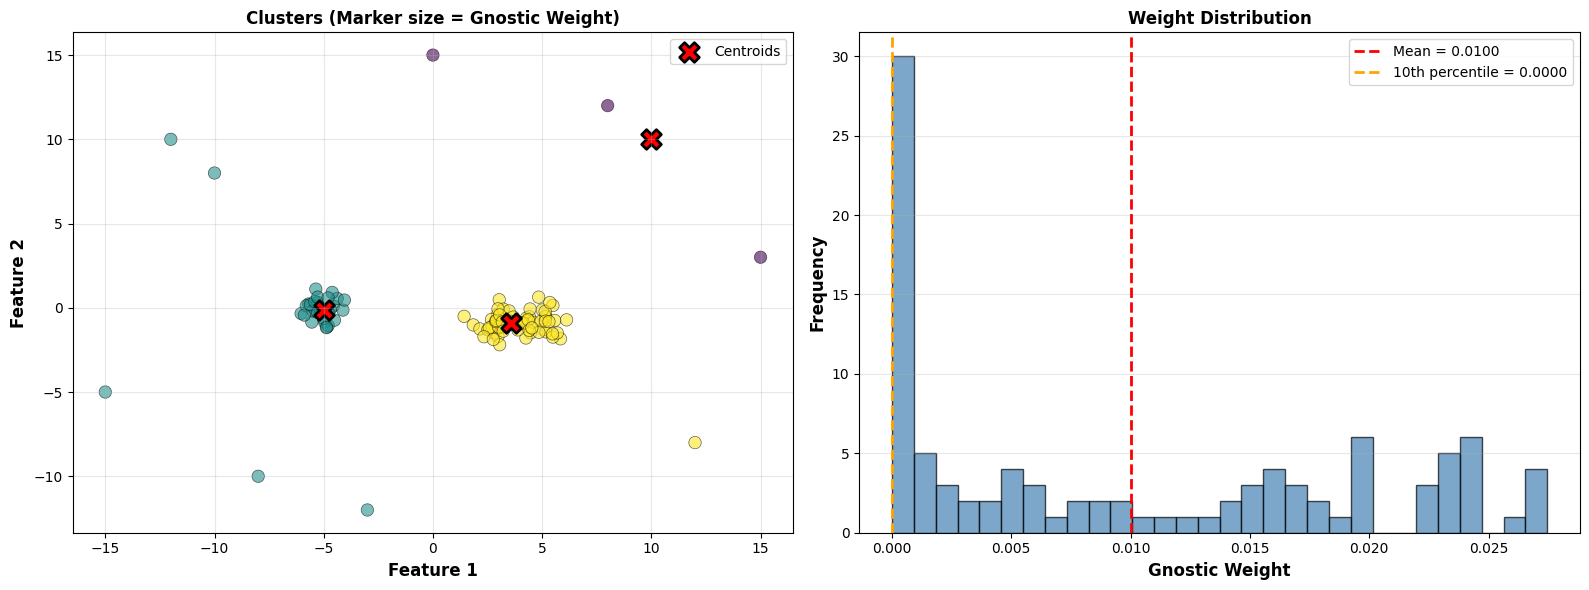

In [8]:
# Visualize data with gnostic weights
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Clusters with marker size proportional to gnostic weight
ax1 = axes[0]
scatter = ax1.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], 
                     c=labels_gnostic, cmap='viridis',
                     s=80,  # Size proportional to weight
                     alpha=0.6, edgecolors='black', linewidths=0.5)
ax1.scatter(model_gnostic.centroids[:, 0], model_gnostic.centroids[:, 1], 
           c='red', marker='X', s=200, edgecolors='black', 
           linewidths=2, label='Centroids')
ax1.set_xlabel('Feature 1', fontsize=12, fontweight='bold')
ax1.set_ylabel('Feature 2', fontsize=12, fontweight='bold')
ax1.set_title('Clusters (Marker size = Gnostic Weight)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Right plot: Weight distribution
ax2 = axes[1]
ax2.hist(weights, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(weights), color='red', linestyle='--', linewidth=2, 
           label=f'Mean = {np.mean(weights):.4f}')
ax2.axvline(low_weight_threshold, color='orange', linestyle='--', linewidth=2,
           label=f'10th percentile = {low_weight_threshold:.4f}')
ax2.set_xlabel('Gnostic Weight', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Weight Distribution', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Example 3: Elbow Method for Optimal K

The elbow method helps determine the optimal number of clusters by plotting inertia vs. number of clusters.

In [9]:
# Generate test data
np.random.seed(42)
X_elbow = generate_clustered_data(n_samples=150, n_clusters=4, cluster_std=0.7)

print(f"Testing K values from 2 to 10 on {len(X_elbow)} samples...")
print("This may take a moment...\n")

# Test different values of K
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    # Fit model
    model_k = KMeansClustering(
        n_clusters=k,
        max_iter=100,
        tolerance=1e-3,
        init='kmeans++',
        verbose=False,
    )
    model_k.fit(X_elbow)
    
    # Calculate inertia (negative of score)
    score = model_k.score(X_elbow)
    inertia = -score
    inertias.append(inertia)
    
    # Calculate silhouette score
    labels_k = model_k.predict(X_elbow)
    if len(np.unique(labels_k)) > 1:
        from machinegnostics.metrics import silhouette_score
        sil_score = silhouette_score(X_elbow, labels_k)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)
    
    print(f"K={k}: Inertia={inertia:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

print("\nElbow analysis complete!")

Testing K values from 2 to 10 on 148 samples...
This may take a moment...

K=2: Inertia=5815.76, Silhouette=0.542
K=3: Inertia=4367.99, Silhouette=0.577
K=4: Inertia=148.06, Silhouette=0.887
K=5: Inertia=132.68, Silhouette=0.729
K=6: Inertia=120.92, Silhouette=0.579
K=7: Inertia=103.61, Silhouette=0.480
K=8: Inertia=114.10, Silhouette=0.610
K=9: Inertia=96.05, Silhouette=0.482
K=10: Inertia=93.52, Silhouette=0.461

Elbow analysis complete!


### Elbow Curve Visualization

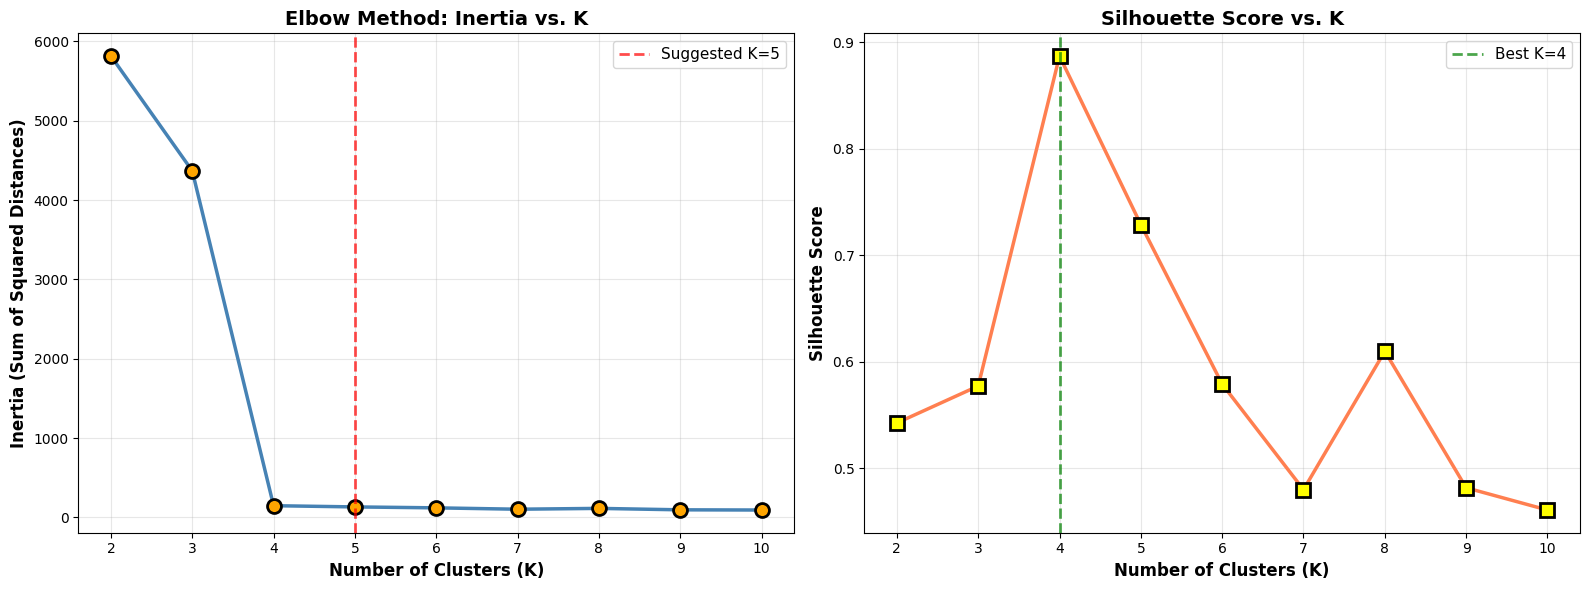


Elbow method suggests: K = 5
Silhouette score suggests: K = 4

Note: Look for the 'elbow' where the curve starts to flatten


In [10]:
# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Inertia (Elbow curve)
ax1 = axes[0]
ax1.plot(K_range, inertias, marker='o', linewidth=2.5, markersize=10, 
        color='steelblue', markerfacecolor='orange', markeredgewidth=2, markeredgecolor='black')
ax1.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (Sum of Squared Distances)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method: Inertia vs. K', fontsize=14, fontweight='bold')
ax1.set_xticks(K_range)
ax1.grid(True, alpha=0.3)

# Add annotation for suggested elbow
# Find elbow using rate of change
diffs = np.diff(inertias)
second_diffs = np.diff(diffs)
elbow_idx = np.argmax(second_diffs) + 2  # +2 because of double diff
elbow_k = list(K_range)[elbow_idx]
ax1.axvline(elbow_k, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Suggested K={elbow_k}')
ax1.legend(fontsize=11)

# Right plot: Silhouette score
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2.5, markersize=10,
        color='coral', markerfacecolor='yellow', markeredgewidth=2, markeredgecolor='black')
ax2.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score vs. K', fontsize=14, fontweight='bold')
ax2.set_xticks(K_range)
ax2.grid(True, alpha=0.3)

# Find best K by silhouette
best_sil_idx = np.argmax(silhouette_scores)
best_sil_k = list(K_range)[best_sil_idx]
ax2.axvline(best_sil_k, color='green', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Best K={best_sil_k}')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nElbow method suggests: K = {elbow_k}")
print(f"Silhouette score suggests: K = {best_sil_k}")
print(f"\nNote: Look for the 'elbow' where the curve starts to flatten")

## Example 4: Convergence Analysis

Examine how the algorithm converges over iterations using history tracking.

In [11]:
# Fit model with history tracking
model_hist = KMeansClustering(
    n_clusters=4,
    max_iter=50,
    tolerance=1e-4,
    init='random',  # Use random init to see more iterations
    verbose=False,
    history=True,
    gnostic_characteristics=True,
)

model_hist.fit(X)

# Extract history
history = model_hist._history
iterations = [h['iteration'] for h in history]
losses = [h['h_loss'] if h['h_loss'] is not None else np.nan for h in history]
rentropies = [h['rentropy'] if h['rentropy'] is not None else np.nan for h in history]
inertias = [h['inertia'] if 'inertia' in h and h['inertia'] is not None else np.nan for h in history]

print(f"Model converged after {len(history)-1} iterations")
print(f"Final loss: {losses[-1]:.6f}")
print(f"Final rentropy: {rentropies[-1]:.6f}")
print(f"Final inertia: {inertias[-1]:.2f}")

Model converged after 19 iterations
Final loss: 57.317981
Final rentropy: 0.231310
Final inertia: 60.14


### Convergence Visualization

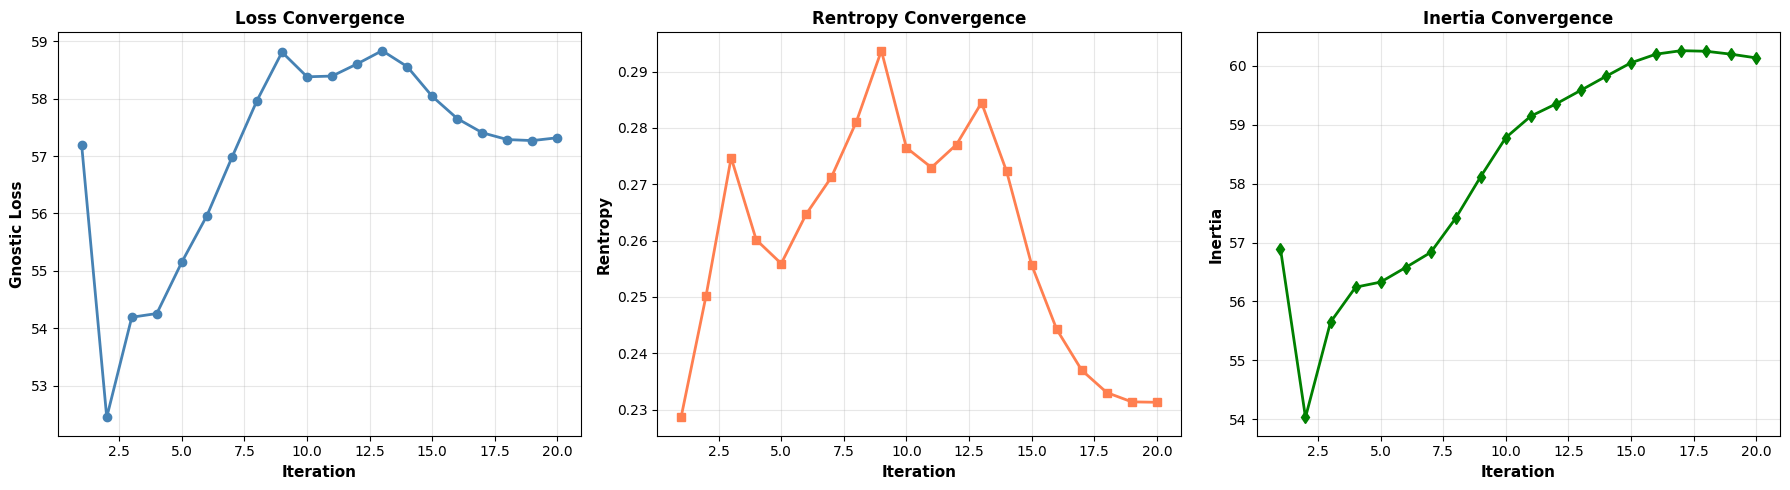

Note: These plots show how the algorithm optimizes over iterations
Lower loss, rentropy, and inertia indicate better clustering


In [12]:
# Plot convergence metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss convergence
axes[0].plot(iterations, losses, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Gnostic Loss', fontsize=11, fontweight='bold')
axes[0].set_title('Loss Convergence', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Rentropy convergence
axes[1].plot(iterations, rentropies, marker='s', linewidth=2, markersize=6, color='coral')
axes[1].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Rentropy', fontsize=11, fontweight='bold')
axes[1].set_title('Rentropy Convergence', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Inertia convergence
axes[2].plot(iterations, inertias, marker='d', linewidth=2, markersize=6, color='green')
axes[2].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Inertia', fontsize=11, fontweight='bold')
axes[2].set_title('Inertia Convergence', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Note: These plots show how the algorithm optimizes over iterations")
print("Lower loss, rentropy, and inertia indicate better clustering")